# Setting up the environment
## Install requirements

# New Section

In [0]:
!wget https://raw.githubusercontent.com/crow-intelligence/growth-hacking-sentiment/master/requirements.txt
!pip install -r requirements.txt

--2020-05-29 15:04:08--  https://raw.githubusercontent.com/crow-intelligence/growth-hacking-sentiment/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     151  --.-KB/s    in 0s      

2020-05-29 15:04:08 (11.5 MB/s) - ‘requirements.txt’ saved [151/151]

     |████████████████████████████████| 194kB 4.9MB/s 
     |████████████████████████████████| 3.8MB 10.9MB/s 
     |████████████████████████████████| 665kB 38.2MB/s 
     |████████████████████████████████| 204kB 53.8MB/s 
     |████████████████████████████████| 1.1MB 57.1MB/s 
     |████████████████████████████████| 890kB 58.7MB/s 
  Created wheel for Keyness: filename=Keyness-0.25-cp36-none-any.

## Install apex

In [0]:
%%writefile setup.sh

export CUDA_HOME=/usr/local/cuda-10.1
git clone https://github.com/NVIDIA/apex
pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex


Writing setup.sh


In [0]:
!sh setup.sh

Cloning into 'apex'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 6920 (delta 7), reused 8 (delta 2), pack-reused 6898
Receiving objects: 100% (6920/6920), 13.78 MiB | 24.00 MiB/s, done.
Resolving deltas: 100% (4642/4642), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-t4693qf6
Created temporary directory: /tmp/pip-req-tracker-m7bz2m0w
Created requirements tracker '/tmp/pip-req-tracker-m7bz2m0w'
Created temporary directory: /tmp/pip-install-hn5ycmzc
Processing ./apex
  Created temporary directory: /tmp/pip-req-build-iatfqy01
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-m7bz2m0w'
    Running setup.py (path:/t

## Connect your Colab notebook to your Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My\ Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
!pip install ndjson
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
 from sklearn import preprocessing
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt
import ndjson
import os



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
os.getcwd()
!ls

 01_intro.ipynb						     Untitled13.ipynb
 apex							     Untitled14.ipynb
 Building+your+Deep+Neural+Network+-+Step+by+Step+v8.ipynb   Untitled1.ipynb
'Copy of Colab_growth_hacking_example.ipynb'		     Untitled2.ipynb
 data							     Untitled3.ipynb
 JT_Colab_growth_hacking_example2.ipynb			     Untitled4.ipynb
 JT_Colab_growth_hacking_example.ipynb			     Untitled5.ipynb
 setup.sh						     Untitled6.ipynb
 Untitled0.ipynb					     Untitled7.ipynb
 Untitled10.ipynb					     Untitled8.ipynb
 Untitled11.ipynb					     Untitled9.ipynb
 Untitled12.ipynb					     withOutMaps.ipynb


In [0]:
%cd /content/drive/My\ Drive/Colab Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [0]:
!ls

apex  requirements.txt	setup.sh  Video_Games_5.json


In [0]:
with open('./Video_Games_5.json') as f:
    data = ndjson.load(f)

3.  Create a plot of the ratings of the product. Study the distribution of the five categories.

In [0]:
df = pd.DataFrame(data)
df_count = df.overall.value_counts()
print(df.head(3))
print(df_count)

   overall  verified   reviewTime  ... vote style image
0      5.0      True  10 17, 2015  ...  NaN   NaN   NaN
1      4.0     False  07 27, 2015  ...  NaN   NaN   NaN
2      3.0      True  02 23, 2015  ...  NaN   NaN   NaN

[3 rows x 12 columns]
5.0    299759
4.0     93654
3.0     49146
1.0     30883
2.0     24135
Name: overall, dtype: int64


In [0]:
print(df.columns)
print(df.head().T)
print(df.describe())

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')
                                                                0  ...                                                  4
overall                                                         5  ...                                                  5
verified                                                     True  ...                                               True
reviewTime                                            10 17, 2015  ...                                        12 25, 2014
reviewerID                                         A1HP7NVNPFMA4N  ...                                     A2RF5B5H74JLPE
asin                                                   0700026657  ...                                         0700026657
reviewerName                                          Ambrosia075  ...          

In [0]:

df_dtypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['name'] = df_dtypes['index']
df_dtypes = df_dtypes[['name','dtypes']]
df_dtypes['first value'] = df.loc[0].values
print(df_dtypes)


              name   dtypes                                        first value
0          overall  float64                                                  5
1         verified     bool                                               True
2       reviewTime   object                                        10 17, 2015
3       reviewerID   object                                     A1HP7NVNPFMA4N
4             asin   object                                         0700026657
5     reviewerName   object                                        Ambrosia075
6       reviewText   object  This game is a bit hard to get the hang of, bu...
7          summary   object                        but when you do it's great.
8   unixReviewTime    int64                                         1445040000
9             vote   object                                                NaN
10           style   object                                                NaN
11           image   object                         

In [0]:
drop_list = ['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'summary', 'unixReviewTime', 'vote', 'style', 'image']
df = df.drop(drop_list, axis=1)

In [0]:
df

,overall,reviewText
0,5.0,"This game is a bit hard to get the hang of, bu..."
1,4.0,I played it a while but it was alright. The st...
2,3.0,ok game.
3,2.0,"found the game a bit too complicated, not what..."
4,5.0,"great game, I love it and have played it since..."
...,...,...
497572,4.0,not OEM but good replacement parts
497573,3.0,Okay stuff.
497574,3.0,This does add some kids room things that are v...
497575,4.0,I think I originally began playing Bioshock se...


In [0]:
df['overall'].value_counts()


5.0    299759
4.0     93654
3.0     49146
1.0     30883
2.0     24135
Name: overall, dtype: int64

In [0]:
df.overall.unique()

array([5., 4., 3., 2., 1.])

In [0]:
df.columns = ['ratings','reviews']
df

,ratings,reviews
0,5.0,"This game is a bit hard to get the hang of, bu..."
1,4.0,I played it a while but it was alright. The st...
2,3.0,ok game.
3,2.0,"found the game a bit too complicated, not what..."
4,5.0,"great game, I love it and have played it since..."
...,...,...
497572,4.0,not OEM but good replacement parts
497573,3.0,Okay stuff.
497574,3.0,This does add some kids room things that are v...
497575,4.0,I think I originally began playing Bioshock se...


3.  Create a plot of the ratings of the product. Study the distribution of the five categories.

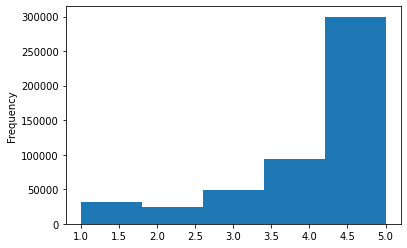

In [0]:
df['ratings'].plot.hist(bins=5)

In [0]:
!pip install altair_viewer
import altair as alt

alt.renderers.enable('html')
alt.renderers.enable('altair_viewer')

alt.data_transformers.enable('default', max_rows=None)

alt.Chart(df).mark_bar().encode(
    alt.X('ratings:Q'),
    y='count():Q',
)



     |████████████████████████████████| 563kB 8.8MB/s 


Displaying chart at http://localhost:23663/

4. Take a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which you will work during Milestones 2-4.
    It is recommended to use imblearn.under_sampling.RandomUnderSampler from the imbalanced-learn package, which should be first installed, then imported.
    If you want to get identical results that are provided as a sample solution, use 42 as a random state.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
print('Original dataset shape {}'.format(Counter(df)))

Original dataset shape Counter({'ratings': 1, 'reviews': 1})


In [0]:
#did not use this time

one_star = df[df.overall == 1]
two_stars = df[df.overall == 2]
three_stars = df[df.overall == 3]
four_stars = df[df.overall == 4]
five_stars = df[df.overall == 5]

print(one_star.head())
print(five_stars.head())

    overall  verified   reviewTime  ... vote style image
6       1.0     False   08 2, 2014  ...    0     0     0
11      1.0     False  05 15, 2012  ...   28     0     0
17      1.0      True  05 18, 2013  ...    0     0     0
18      1.0     False  01 10, 2013  ...    0     0     0
25      1.0      True  06 30, 2014  ...    0     0     0

[5 rows x 12 columns]
    overall  verified   reviewTime  ... vote style image
0       5.0      True  10 17, 2015  ...    0     0     0
4       5.0      True  12 25, 2014  ...    0     0     0
7       5.0      True   03 3, 2014  ...    0     0     0
8       5.0      True  02 21, 2014  ...    0     0     0
12      5.0      True  08 14, 2011  ...   11     0     0

[5 rows x 12 columns]


In [0]:
df.dtypes


ratings    float64
reviews     object
dtype: object

In [0]:
df.shape

(497577, 2)

In [0]:
df.isnull().sum()

ratings      0
reviews    158
dtype: int64

In [0]:
df.fillna(0, inplace=True)

In [0]:
df.isnull().sum()

ratings    0
reviews    0
dtype: int64

In [0]:
type(df.ratings)

pandas.core.series.Series

In [0]:
le = preprocessing.?LabelEncoder

In [0]:
?preprocessing.LabelEncoder

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#X_os = df.iloc[:, : ]
#y_os = df.iloc[:,[0]]


In [0]:
??CountVectorizer

In [0]:
type(y_os)


pandas.core.frame.DataFrame

In [0]:
y_os

,ratings
0,5.0
1,4.0
2,3.0
3,2.0
4,5.0
...,...
497572,4.0
497573,3.0
497574,3.0
497575,4.0


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
df_rand_corpus = np.random.randint(df.values, size=100_000)

ValueError: ignored

In [0]:
X_os
X_os.ndim
X_os.shape


(497577, 2)

In [0]:
y_os.ndim
y_os.shape

(497577, 1)

In [0]:
y_os.isnull().sum()

ratings    0
dtype: int64

In [0]:
y_os.ratings < 0

0         False
1         False
2         False
3         False
4         False
          ...  
497572    False
497573    False
497574    False
497575    False
497576    False
Name: ratings, Length: 497577, dtype: bool

In [0]:
X_os.isnull().sum()

ratings    0
reviews    0
dtype: int64

In [0]:
type(X_os.reviews)

pandas.core.series.Series

In [0]:
X_os

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [0]:
X_os.toarray()

array([[1, 0],
       [0, 1]])

In [0]:
sampling_strategy = {'ratings':{ 1: 1500, 2: 500, 3:500, 4:500, 5:1500}}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X_os, y_os.ratings)
print((X-res.shape, y_res.shape))

ValueError: ignored

In [0]:
import numpy as np
np.random.randint((X_os.reviews), size=100000)

ValueError: ignored

5. Take a random sample of the reviews by selecting 100,000 reviews. This way you get a bigger representative corpus, on which you will work in Milestones 4 and 5.
    It is recommended to use numpy.random.randint.
    If you want to get identical results that are provided as a sample solution, use 42 as a random state.

6.  Export your corpora to two separate csv files. Both of your tables should contain a column for the reviews and a column for the ratings. From now on we call the review text of the Jason key as *reviews* and the overall key as ratings. Name your corpora as **small_corpus** and **big_corpus**.

*** FYI:  I was unable to determine how to numericalize the text column in order to use RandomUnderSampler or np.Random methods to create the required lists for this week's exercises.  After a multitude of unsuccesfull attempts to solve this seemingly simple and initial problem, I am submitting this unfinished notebook in order to see the project's solution and move forward on more productive learning.
